In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/breast-cancer-wisconsin-prognostic-data-set/data 2.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings   # To ignore any warnings 
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('/kaggle/input/breast-cancer-wisconsin-prognostic-data-set/data 2.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [5]:
df.drop(['Unnamed: 32','id'], axis=1, inplace=True)

In [6]:
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [7]:
df['diagnosis'].replace(['M','B'],[1,0],inplace=True)

In [8]:
test = df.drop('diagnosis',axis=1)
train = df

In [9]:
train.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [10]:
test.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [11]:
train.dtypes

diagnosis                    int64
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

In [12]:
train.shape, test.shape

((569, 31), (569, 30))

In [13]:
train['diagnosis'].value_counts()

diagnosis
0    357
1    212
Name: count, dtype: int64

In [14]:
# Normaalize can set to True to print proportions instead of number
train['diagnosis'].value_counts(normalize=True)

diagnosis
0    0.627417
1    0.372583
Name: proportion, dtype: float64

<Axes: xlabel='diagnosis'>

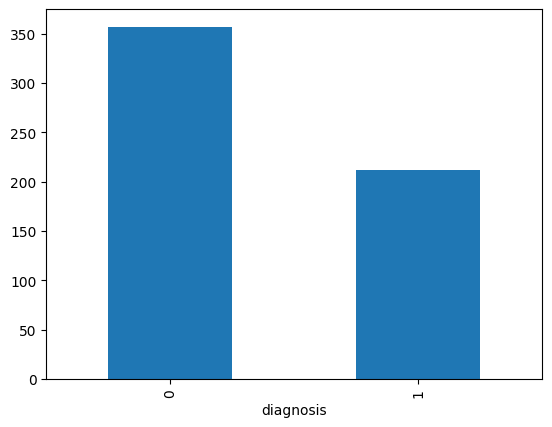

In [15]:
train['diagnosis'].value_counts().plot.bar()

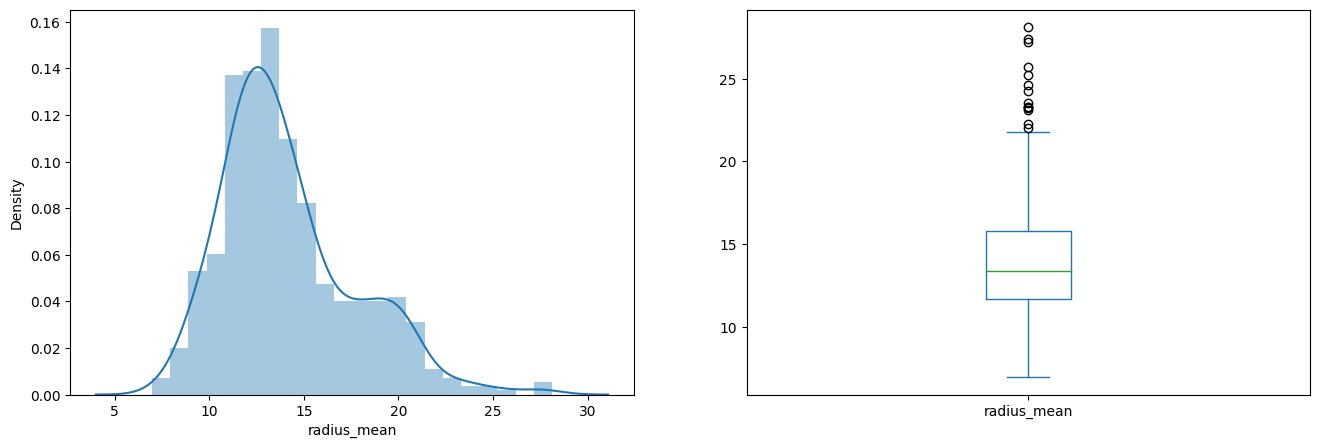

In [16]:
plt.figure(1) 
plt.subplot(121) 
sns.distplot(train['radius_mean']); 
plt.subplot(122) 
train['radius_mean'].plot.box(figsize=(16,5)) 
plt.show()

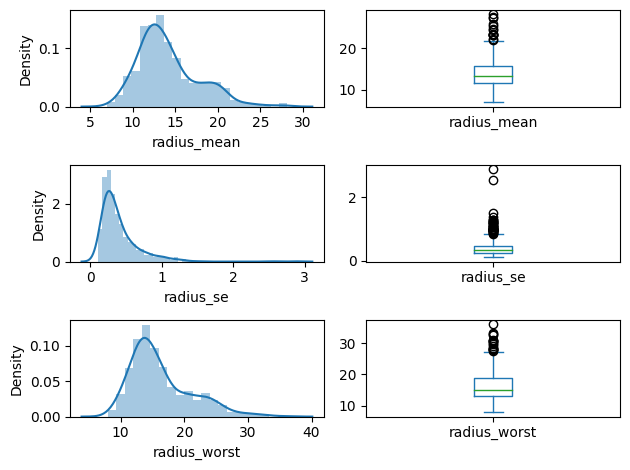

In [17]:
plt.figure() 
plt.subplot(321) 
sns.distplot(train['radius_mean']); 
plt.subplot(322) 
train['radius_mean'].plot.box() 
plt.subplot(323) 
sns.distplot(train['radius_se']); 
plt.subplot(324) 
train['radius_se'].plot.box() 
plt.subplot(325) 
sns.distplot(train['radius_worst']); 
plt.subplot(326) 
train['radius_worst'].plot.box() 
plt.tight_layout()
plt.show()


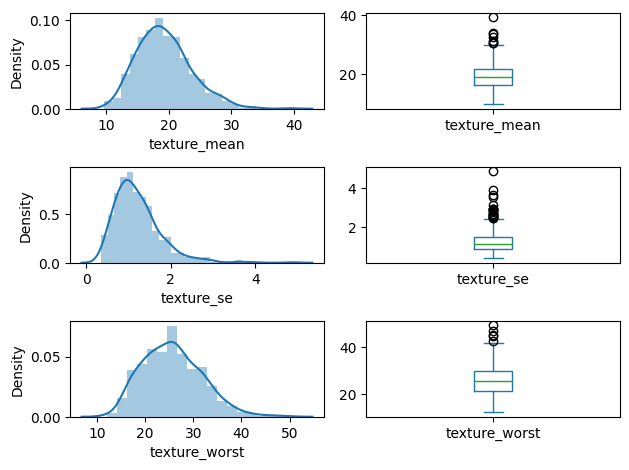

In [18]:
plt.figure() 
plt.subplot(321) 
sns.distplot(train['texture_mean']); 
plt.subplot(322) 
train['texture_mean'].plot.box() 
plt.subplot(323) 
sns.distplot(train['texture_se']); 
plt.subplot(324) 
train['texture_se'].plot.box() 
plt.subplot(325) 
sns.distplot(train['texture_worst']); 
plt.subplot(326) 
train['texture_worst'].plot.box() 
plt.tight_layout()
plt.show()

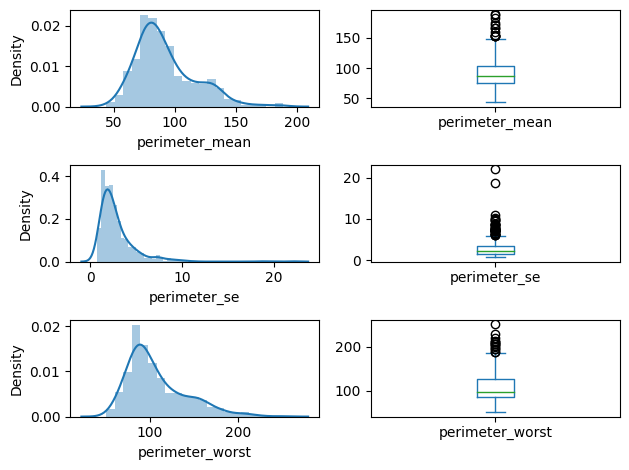

In [19]:
plt.figure() 
plt.subplot(321) 
sns.distplot(train['perimeter_mean']); 
plt.subplot(322) 
train['perimeter_mean'].plot.box() 
plt.subplot(323) 
sns.distplot(train['perimeter_se']); 
plt.subplot(324) 
train['perimeter_se'].plot.box() 
plt.subplot(325) 
sns.distplot(train['perimeter_worst']); 
plt.subplot(326) 
train['perimeter_worst'].plot.box() 
plt.tight_layout()
plt.show()

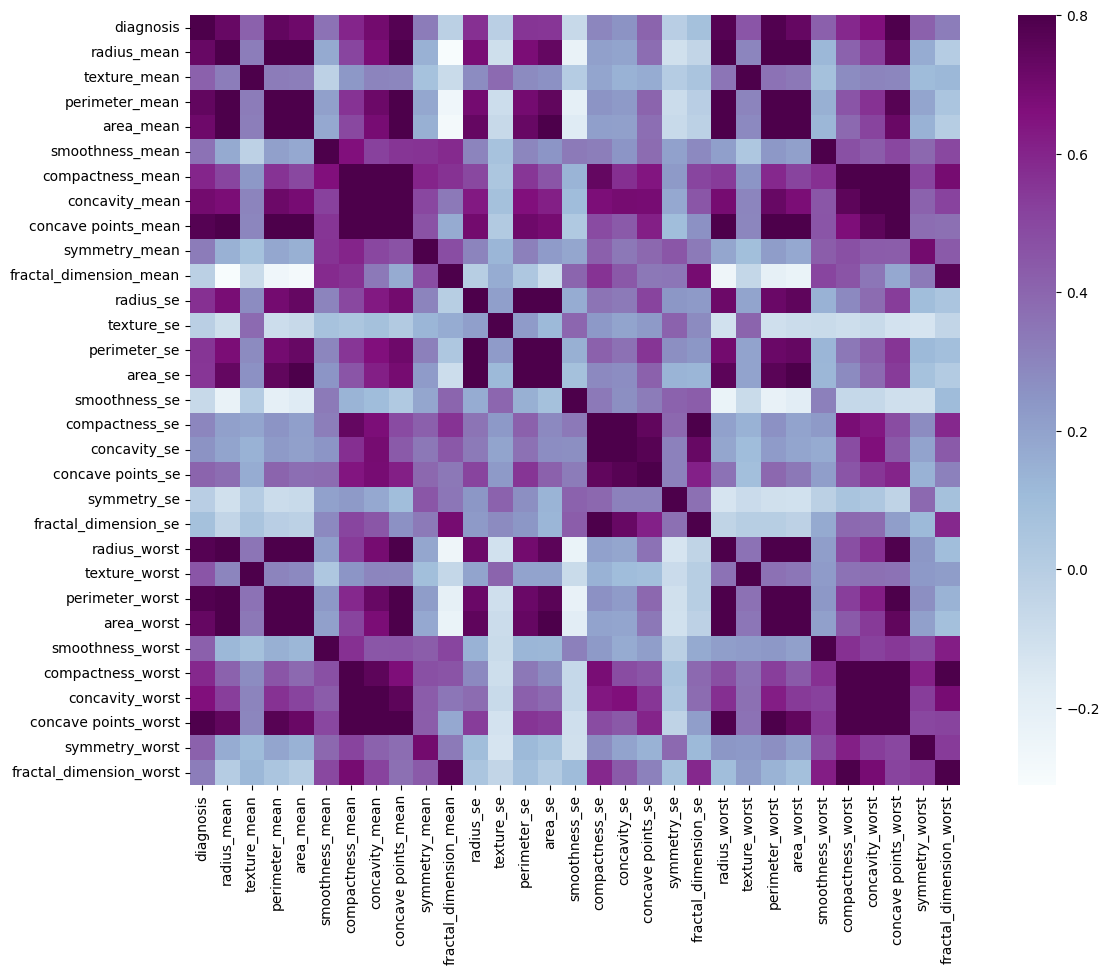

In [20]:
matrix = train.corr()
f, ax = plt.subplots(figsize=(15, 10)) 
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu");

In [21]:
x = train.drop('diagnosis',axis=1)
y = train.diagnosis

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [24]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn import tree

In [25]:
i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(x,y):     
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
    xtr,xvl = x.loc[train_index],x.loc[test_index]     
    ytr,yvl = y[train_index],y[test_index]         
    model = tree.DecisionTreeClassifier(random_state=1)     
    model.fit(xtr, ytr)     
    pred_test = model.predict(xvl)     
    score = accuracy_score(yvl,pred_test)     
    print('accuracy_score',score)     
    i+=1
    
pred_test = model.predict(test)


1 of kfold 5
accuracy_score 0.8947368421052632

2 of kfold 5
accuracy_score 0.9122807017543859

3 of kfold 5
accuracy_score 0.9298245614035088

4 of kfold 5
accuracy_score 0.9210526315789473

5 of kfold 5
accuracy_score 0.8938053097345132


In [26]:
from sklearn.ensemble import RandomForestClassifier

In [27]:
i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(x,y):     
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
    xtr,xvl = x.loc[train_index],x.loc[test_index]     
    ytr,yvl = y[train_index],y[test_index]         
    model = RandomForestClassifier(random_state=1, max_depth=10)     
    model.fit(xtr, ytr)     
    pred_test = model.predict(xvl)     
    score = accuracy_score(yvl,pred_test)     
    print('accuracy_score',score)     
    i+=1 

pred_test = model.predict(test)


1 of kfold 5
accuracy_score 0.9473684210526315

2 of kfold 5
accuracy_score 0.9736842105263158

3 of kfold 5
accuracy_score 0.9298245614035088

4 of kfold 5
accuracy_score 0.9649122807017544

5 of kfold 5
accuracy_score 0.9557522123893806


In [28]:
i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(x,y):     
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
    xtr,xts = x.loc[train_index],x.loc[test_index]     
    ytr,yts = y[train_index],y[test_index]         
    model = RandomForestClassifier(random_state=1, max_depth=3, n_estimators=41)     
    model.fit(xtr, ytr)     
    pred_test = model.predict(xts)     
    score = accuracy_score(yts,pred_test)     
    print('accuracy_score',score)     
    i+=1 
pred_test = model.predict(test) 
pred2=model.predict_proba(test)[:,1]


1 of kfold 5
accuracy_score 0.9473684210526315

2 of kfold 5
accuracy_score 0.9824561403508771

3 of kfold 5
accuracy_score 0.9298245614035088

4 of kfold 5
accuracy_score 0.9824561403508771

5 of kfold 5
accuracy_score 0.9380530973451328


In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [30]:
xtr,xts = x.loc[train_index],x.loc[test_index]     
ytr,yts = y[train_index],y[test_index]         
model = KNeighborsClassifier(n_neighbors=10, metric='manhattan')
print(cross_val_score(model,xtr,ytr))

[0.86956522 0.9010989  0.95604396 0.95604396 0.94505495]


In [31]:
from sklearn.svm import SVC

In [32]:
svc = SVC()
svc.fit(x_train, y_train)

SVC()

In [33]:
svc.score(x_test, y_test), svc.score(x_train, y_train)

(0.9122807017543859, 0.9230769230769231)

In [34]:
svc.support_vectors_

array([[1.411e+01, 1.288e+01, 9.003e+01, ..., 5.890e-02, 2.100e-01,
        7.083e-02],
       [1.345e+01, 1.830e+01, 8.660e+01, ..., 7.911e-02, 2.678e-01,
        6.603e-02],
       [1.785e+01, 1.323e+01, 1.146e+02, ..., 8.341e-02, 1.783e-01,
        5.871e-02],
       ...,
       [1.448e+01, 2.146e+01, 9.425e+01, ..., 1.225e-01, 3.020e-01,
        6.846e-02],
       [1.348e+01, 2.082e+01, 8.840e+01, ..., 2.258e-01, 2.807e-01,
        1.071e-01],
       [1.328e+01, 2.028e+01, 8.732e+01, ..., 1.492e-01, 3.739e-01,
        1.027e-01]])

In [35]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}


In [36]:
from sklearn.model_selection import GridSearchCV

In [37]:
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

grid_search.fit(x_train, y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [38]:
grid_search.best_score_

0.9604680950163018

In [39]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=5, min_samples_leaf=5, n_estimators=200,
                       n_jobs=-1, random_state=42)

In [40]:
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

In [41]:
'''estimator = [('knn',KNeighborsClassifier(n_neighbors=10, metric='manhattan')),
             ('svc',SVC()),('rf',RandomForestClassifier(random_state=1, max_depth=10)),
             ('tree',tree.DecisionTreeClassifier(random_state=1)),('grid', GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy"))]'''

'estimator = [(\'knn\',KNeighborsClassifier(n_neighbors=10, metric=\'manhattan\')),\n             (\'svc\',SVC()),(\'rf\',RandomForestClassifier(random_state=1, max_depth=10)),\n             (\'tree\',tree.DecisionTreeClassifier(random_state=1)),(\'grid\', GridSearchCV(estimator=rf,\n                           param_grid=params,\n                           cv = 4,\n                           n_jobs=-1, verbose=1, scoring="accuracy"))]'

In [42]:
vot_hard = VotingClassifier(estimators = [('knn',KNeighborsClassifier(n_neighbors=10, metric='manhattan')),
             ('svc',SVC()),('rf',RandomForestClassifier(random_state=1, max_depth=10)),
             ('tree',tree.DecisionTreeClassifier(random_state=1)),('grid',GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy"))],voting='hard')
vot_hard.fit(x_train, y_train)
y_pred = vot_hard.predict(x_test)

Fitting 4 folds for each of 180 candidates, totalling 720 fits


In [43]:
score = accuracy_score(y_test, y_pred)
score

0.956140350877193